In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [2]:
df_jeux_up = pd.read_csv("../data/details_clean.csv")

In [3]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

# II. Statistiques

## 1. Répartitions des valeurs NaN dans la base de données des jeux : 

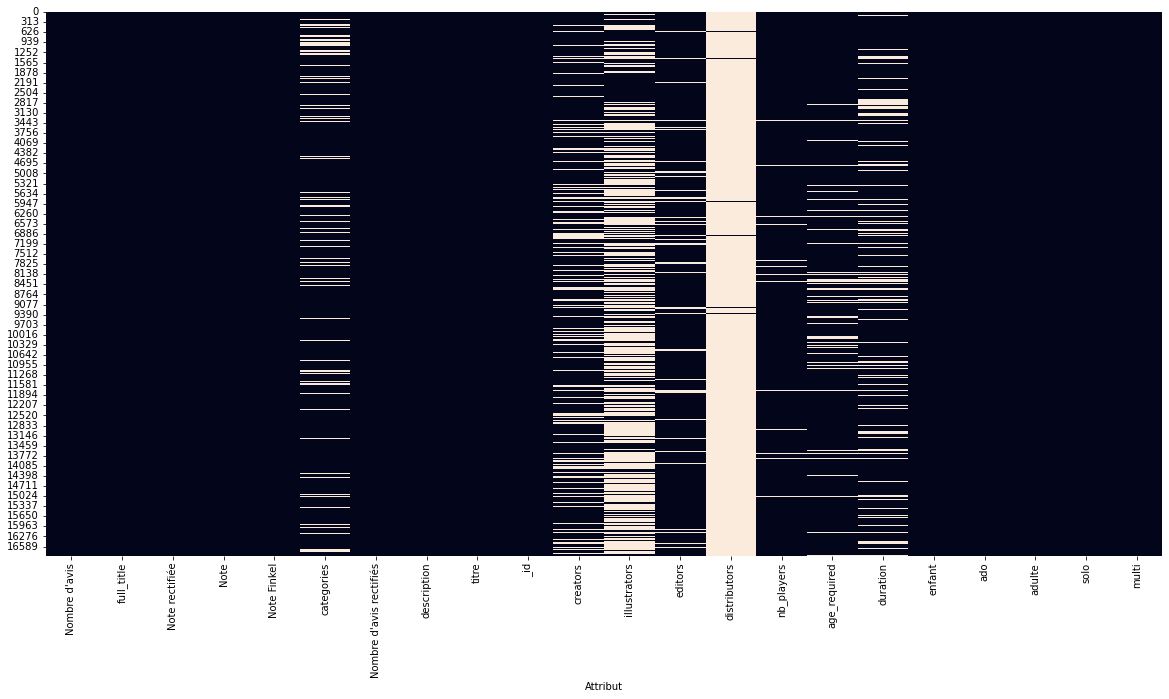

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df_jeux_up.isna(), cbar=False)
plt.xlabel("Attribut")
plt.show()

In [5]:
print("Le % de NaN pour l'attribut illustrators :", 100 * np.where(df_jeux_up["illustrators"].isna(), 1, 0).sum() / len(df_jeux_up["illustrators"]), "%")

Le % de NaN pour l'attribut illustrators : 56.48669471937415 %


In [6]:
print("Le % de NaN pour l'attribut distributors :", 100 * np.where(df_jeux_up["distributors"].isna(), 1, 0).sum() / len(df_jeux_up["distributors"]), "%")

Le % de NaN pour l'attribut distributors : 99.03395958039471 %


In [7]:
print("Le % de NaN pour l'attribut categories :", 100 * np.where(df_jeux_up["categories"].isna(), 1, 0).sum() / len(df_jeux_up["categories"]), "%")

Le % de NaN pour l'attribut categories : 13.026729093818526 %


On remarque que : 

- L'attribut `distributors` est quasi-vide (c'est à dire contient beaucoup de NaN, 99% sont des NaN), on peut le supprimer.

- Que certain jeux n'ont pas de categories (13% jeux sans categories)

- Les attributs du castings c'est les données les plus manquantes

## 2. Répartition des notes

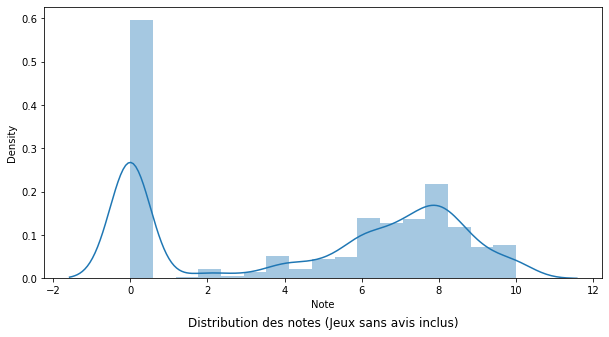

In [8]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up["Note"])
plt.title("Distribution des notes (Jeux sans avis inclus)", y=-0.2)
plt.show()

In [9]:
print("Le % des notes nulles :", 100 * np.where(df_jeux_up["Note"] == 0, 1, 0).sum() / len(df_jeux_up["Note"]), "%")

Le % des notes nulles : 35.07971315118829 %


- On remarque qu'il y a beaucoup de jeux avec une note de 0, pour expliquer ce phénomène on pose comme hypothèse que 0 est la note par défaut des jeux sans avis, 35% de jeux avec une note de 0

### On va essayer de prouver cette hypothèse

In [10]:
jeux_avis = df_avis_up["title_id_jeu"].value_counts()

In [11]:
values = jeux_avis.keys().tolist()
counts = jeux_avis.tolist()
value_dict = dict(zip(values, counts))

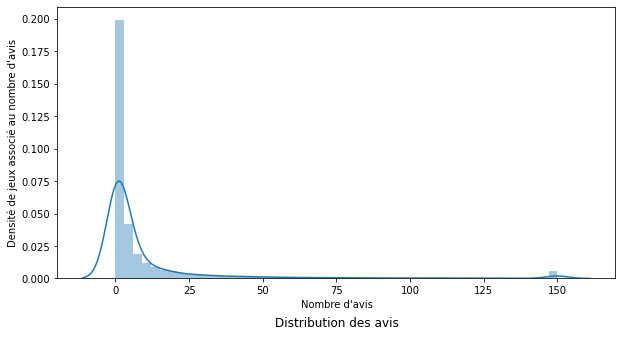

In [12]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up['_id'].map(value_dict).fillna(0))
plt.title("Distribution des avis", y=-0.2)
plt.xlabel("Nombre d'avis")
plt.ylabel("Densité de jeux associé au nombre d'avis")
plt.show()

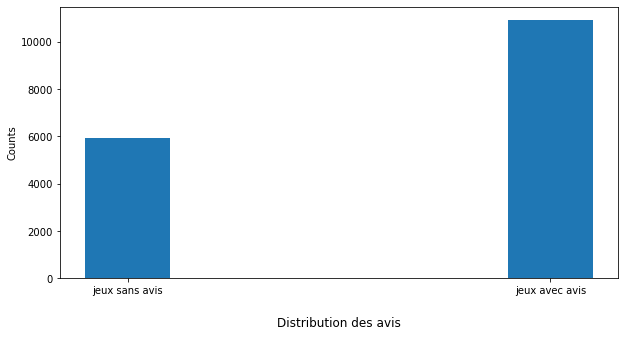

In [13]:
plt.figure(figsize=(10, 5))
data = np.where(df_jeux_up['_id'].isin(values), 1, 0)
_, counts = np.unique(data, return_counts=True)

plt.bar(["jeux sans avis", "jeux avec avis"], counts, width=0.2)
plt.title("Distribution des avis", y=-0.2)
plt.ylabel("Counts")
plt.show()

In [14]:
nb_avis_jeux = df_jeux_up['_id'].map(value_dict).fillna(0)
print("Le % des jeux sans avis :", 100 * np.where(nb_avis_jeux == 0, 1, 0).sum() / len(nb_avis_jeux), "%")

Le % des jeux sans avis : 35.18639246132875 %


- On a le même % de jeux sans avis que de jeux avec une note de 0 (35%)

### On vérifie que les jeux sans avis ont bien une note par défaut de 0

<Figure size 720x360 with 0 Axes>

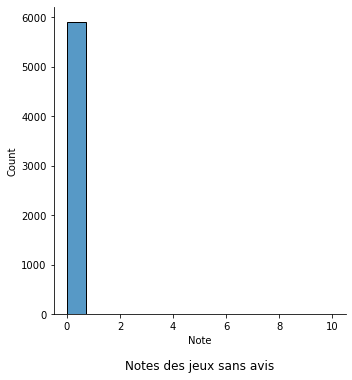

In [15]:
plt.figure(figsize=(10, 5))
sns.displot(df_jeux_up[~df_jeux_up['_id'].isin(values)]["Note"])
plt.title("Notes des jeux sans avis", y=-0.2)
plt.show()

### La vraie répartition des notes

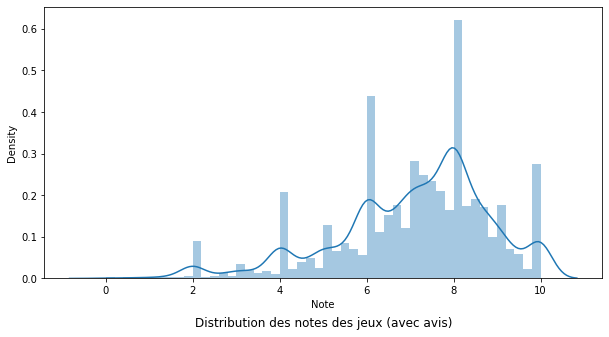

In [16]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up[df_jeux_up['_id'].isin(values)]["Note"])
plt.title("Distribution des notes des jeux (avec avis)", y=-0.2)
plt.show()

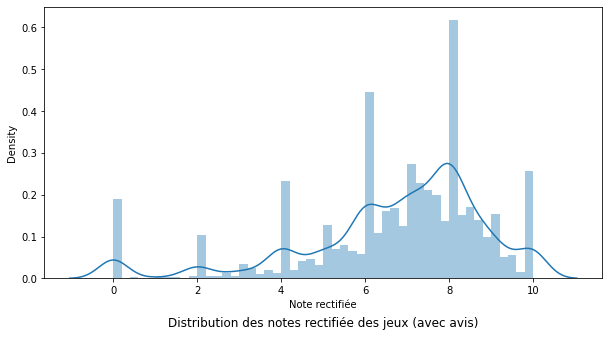

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up[df_jeux_up['_id'].isin(values)]["Note rectifiée"])
plt.title("Distribution des notes rectifiée des jeux (avec avis)", y=-0.2)
plt.show()

On voit que les distributions des notes et des notes rectifiées sont quasiment les mêmes

In [18]:
print("La corrélation entre Note et Note rectifiée est de :", df_jeux_up.corr()["Note"]["Note rectifiée"])

La corrélation entre Note et Note rectifiée est de : 0.9373903809860741


Notes et notes rectifiées sont très corrélées

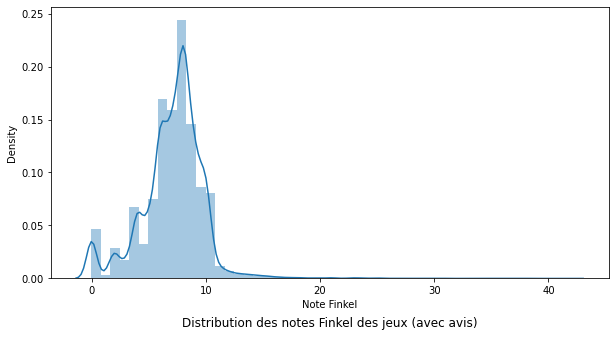

In [19]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up[df_jeux_up['_id'].isin(values)]["Note Finkel"])
plt.title("Distribution des notes Finkel des jeux (avec avis)", y=-0.2)
plt.show()

D'aprés <https://www.trictrac.net/forum/sujet/notes-rectifiees-notes-finkel>

La note Finkel est une combinaison linéaire entre la note et le nombre d'avis d'un jeu, exprimée de la manière suivante : 

$Note Finkel = moyenneNotes + (ajustementFinkel * nombreAvis)$

On peut également le remarqué avec la matrice de corrélation ci-dessous : 

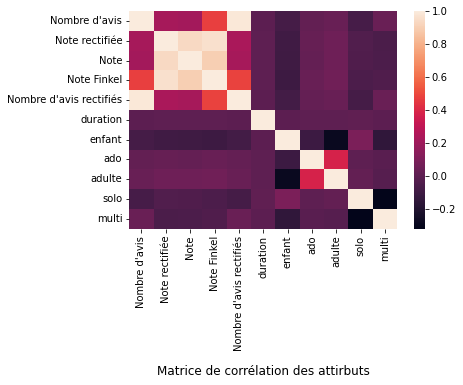

In [20]:
sns.heatmap(df_jeux_up.corr())
plt.title('Matrice de corrélation des attirbuts', y=-0.7)
plt.show()

## 3. Les categories d'age : 

In [21]:
n_enfant_uniq = len(df_jeux_up.query('enfant == 1 & ado == 0 & adulte == 0'))
n_ado_uniq    = len(df_jeux_up.query('enfant == 0 & ado == 1 & adulte == 0'))
n_adulte_uniq = len(df_jeux_up.query('enfant == 0 & ado == 0 & adulte == 1'))
n_enfant_ado  = len(df_jeux_up.query('enfant == 1 & ado == 1 & adulte == 0'))
n_ado_adulte  = len(df_jeux_up.query('enfant == 0 & ado == 1 & adulte == 1'))
n_tout        = len(df_jeux_up.query('enfant == 1 & ado == 1 & adulte == 1'))

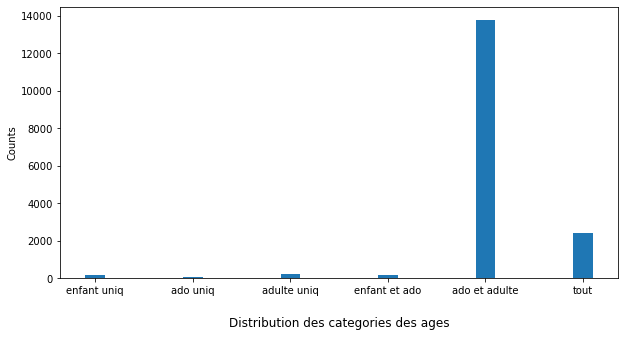

In [22]:
plt.figure(figsize=(10, 5))

plt.bar(["enfant uniq", "ado uniq", "adulte uniq", "enfant et ado", "ado et adulte", "tout"], 
        [n_enfant_uniq, n_ado_uniq, n_adulte_uniq,    n_enfant_ado,    n_ado_adulte, n_tout], 
        width=0.2)

plt.title("Distribution des categories des ages", y=-0.2)
plt.ylabel("Counts")
plt.show()

## 4. Les modes de jeux : 

In [23]:
n_solo_uniq  = len(df_jeux_up.query('solo == 1 & multi == 0'))
n_multi_uniq = len(df_jeux_up.query('solo == 0 & multi == 1'))
n_tout       = len(df_jeux_up.query('solo == 1 & multi == 1'))

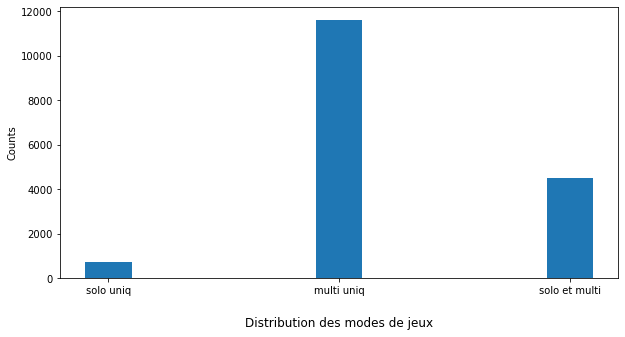

In [24]:
plt.figure(figsize=(10, 5))

plt.bar(["solo uniq", "multi uniq", "solo et multi"], 
        [n_solo_uniq, n_multi_uniq,          n_tout], 
        width=0.2)

plt.title("Distribution des modes de jeux", y=-0.2)
plt.ylabel("Counts")
plt.show()

## 5. Les durées des jeux :

In [25]:
duration = df_jeux_up[df_jeux_up["duration"].notna()]["duration"]

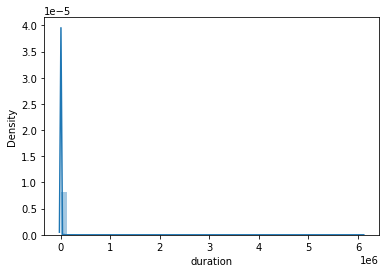

In [26]:
sns.distplot(duration)
plt.show()

In [27]:
duration = np.array(duration)

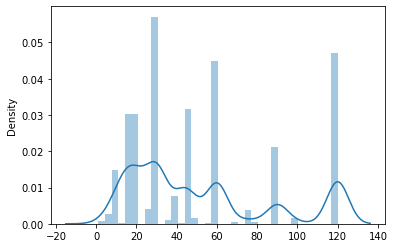

In [28]:
max_dur = 60 * 2
m_duration = np.where(duration > max_dur, max_dur, duration)
sns.distplot(m_duration)
plt.show()